In [3]:
#importing packages and libraries
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries

import numpy as np

**Trying to predict stock price movements by giving in stock price movements instead of just simple stock prices as input**


**In this notebook we normalized only the closing prices and then broke it into train and test datasets. Keeping simple lookback window to give all similar data same movement(movement is just giving the data points the same kind of normalization) and put them in price points as input**



In [4]:
import pandas as pd 
df3 = pd.read_csv('AMZN.csv')


In [5]:
df3 = df3.dropna(axis = "columns")

In [6]:
df3.head()

,Date,Open,High,Low,Adj Close,Volume,Close
0,1/4/2010,136.250000,136.610001,133.139999,133.899994,7599900,133.899994
1,1/5/2010,133.429993,135.479996,131.809998,134.690002,8851900,134.690002
2,1/6/2010,134.600006,134.729996,131.649994,132.250000,7178800,132.250000
3,1/7/2010,132.009995,132.320007,128.800003,130.000000,11030200,130.000000
4,1/8/2010,130.559998,133.679993,129.029999,133.520004,9830500,133.520004


 working with a conventional OHCLV dataset

In [8]:
df_close = df3['Close']

In [9]:
df_close.shape

(2265,)

In [10]:
#Reshaping it
df_close = df_close.values.reshape(2265,1)

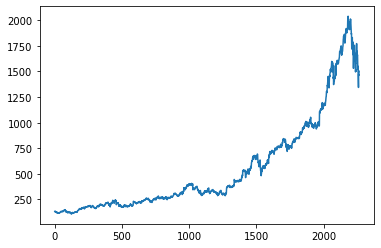

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Ploting it
plt.plot(df_close)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close)


In [12]:
train_size = int(len(df_close) * 0.80)
test_size = len(df_close) - train_size
train, test = df_close[0:train_size,:], df_close[train_size:len(df_close),:]
print(len(train), len(test))

1812 453


**Normalize the values such that prices are reduced to normalized values and I can predict stock movement instead of actual prices**

In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): #keep only similar value data if a data point is too far of the last one jump to the next value
	dataX, dataY = [], []       #put this in data x
	for i in range(len(dataset)-look_back-1): #let dataY have only output values
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
#Step 2 Build Model
model = Sequential()
model.add(LSTM(
    input_dim=1,
    return_sequences=True,units=50))


model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print ('compilation time : ', time.time() - start)

compilation time :  0.005909442901611328


In [17]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=100,
    validation_split=0.05)

Epoch 1/100
14/14 [==============================] - 15s 54ms/step - loss: 0.0117 - mae: 0.0749 - val_loss: 0.0504 - val_mae: 0.2238
Epoch 2/100
14/14 [==============================] - 0s 20ms/step - loss: 0.0062 - mae: 0.0614 - val_loss: 0.0355 - val_mae: 0.1878
Epoch 3/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0048 - mae: 0.0551 - val_loss: 0.0306 - val_mae: 0.1744
Epoch 4/100
14/14 [==============================] - 0s 20ms/step - loss: 0.0031 - mae: 0.0439 - val_loss: 0.0142 - val_mae: 0.1186
Epoch 5/100
14/14 [==============================] - 0s 19ms/step - loss: 0.0015 - mae: 0.0299 - val_loss: 0.0047 - val_mae: 0.0682
Epoch 6/100
14/14 [==============================] - 0s 19ms/step - loss: 5.1213e-04 - mae: 0.0166 - val_loss: 6.5063e-05 - val_mae: 0.0070
Epoch 7/100
14/14 [==============================] - 0s 18ms/step - loss: 2.6422e-04 - mae: 0.0119 - val_loss: 3.9224e-05 - val_mae: 0.0047
Epoch 8/100
14/14 [==============================] - 0s 20m

**is it overtrained? lets run again with 50 epochs**

In [18]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=50,
    validation_split=0.05)

Epoch 1/50
14/14 [==============================] - 0s 28ms/step - loss: 1.1113e-04 - mae: 0.0077 - val_loss: 3.3918e-05 - val_mae: 0.0045
Epoch 2/50
14/14 [==============================] - 0s 19ms/step - loss: 1.4274e-04 - mae: 0.0084 - val_loss: 1.1403e-04 - val_mae: 0.0096
Epoch 3/50
14/14 [==============================] - 0s 19ms/step - loss: 1.2346e-04 - mae: 0.0077 - val_loss: 1.2829e-04 - val_mae: 0.0104
Epoch 4/50
14/14 [==============================] - 0s 18ms/step - loss: 1.1873e-04 - mae: 0.0077 - val_loss: 8.5220e-05 - val_mae: 0.0082
Epoch 5/50
14/14 [==============================] - 0s 19ms/step - loss: 1.0990e-04 - mae: 0.0075 - val_loss: 2.2774e-04 - val_mae: 0.0143
Epoch 6/50
14/14 [==============================] - 0s 19ms/step - loss: 1.2420e-04 - mae: 0.0080 - val_loss: 5.0044e-05 - val_mae: 0.0058
Epoch 7/50
14/14 [==============================] - 0s 19ms/step - loss: 1.0951e-04 - mae: 0.0077 - val_loss: 3.0390e-05 - val_mae: 0.0041
Epoch 8/50
14/14 [=========

**Final Predictions**

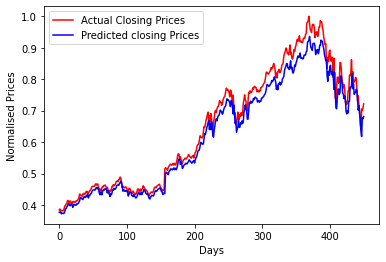

In [19]:
import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

**So LSTM  works great to predict Closing Prices when we normalize the prices and predict the stock Price movement.**

In [20]:
mae = model.evaluate(trainX,
    trainY,
    batch_size=128,verbose=1)

15/15 [==============================] - 0s 3ms/step - loss: 4.0893e-05 - mae: 0.0054


**Seems like using LSTM to predict stock price movement gives much better prediction resullts!!**


### CONCLUSION
1. OVERFITTING DUE TO LIMITED DATASIZE

2. EXCESSIVE FEATURE EXTRACTION

3. HAVING WRONG PREDICTIONS DUE TO WRONG TYPE OF NORMALIZATION

4. NO HYPERPARAMTER TUNING